# Hitters

In [ ]:
# Download the dataset
download.file("https://myslu.stlawu.edu/~ltorrey/ml/Hitters.csv", "Hitters.csv")
Hitters <- read.csv("Hitters.csv", stringsAsFactors = TRUE)

# Regularized regression

In [ ]:
install.packages("glmnet") # ~ 3 minutes
library(glmnet) # glmnet, cv.glmnet

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



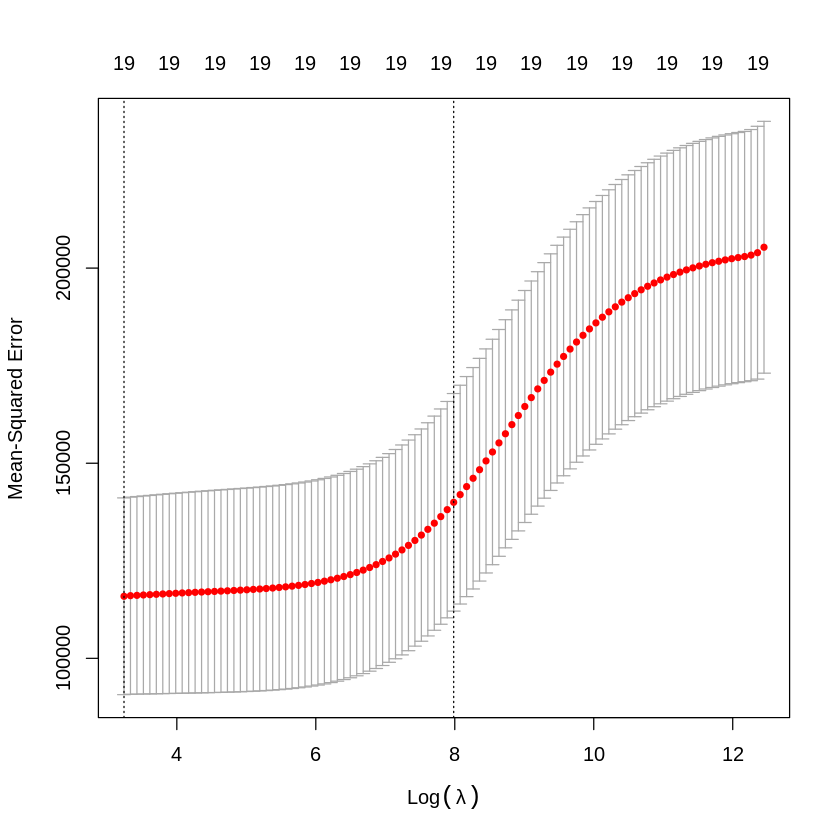

In [ ]:
# Perform ridge regression (alpha = 0) and consider lambdas
x <- model.matrix(salary ~ ., Hitters)[, -1]
y <- Hitters$salary
ridge.lm <- cv.glmnet(x, y, standardize = TRUE, alpha = 0)
plot(ridge.lm)

In [ ]:
# Lambda options
ridge.lm$lambda.min
ridge.lm$lambda.1se

[1] 25.52821

[1] 2935.124

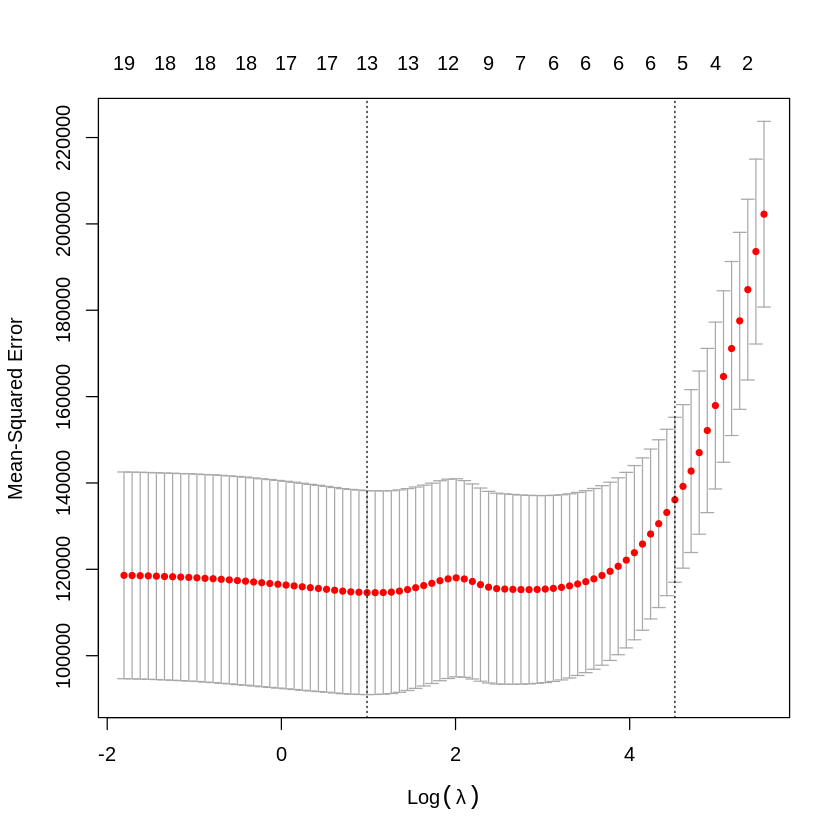

In [ ]:
# Perform lasso regression (alpha = 1) and consider lambdas
x <- model.matrix(salary ~ ., Hitters)[, -1]
y <- Hitters$salary
lasso.lm <- cv.glmnet(x, y, standardize = TRUE, alpha = 1)
plot(lasso.lm)

In [ ]:
# Lambda options
lasso.lm$lambda.min
lasso.lm$lambda.1se

[1] 2.674375

[1] 91.74363

In [ ]:
# Coefficient effects
full.coef <- coef(lm(salary ~ ., data = Hitters))
ridge.coef <- as.vector(coef(ridge.lm, s = ridge.lm$lambda.1se))
lasso.coef <- as.vector(coef(lasso.lm, s = lasso.lm$lambda.1se))
options(scipen=100) # Don't use scientific notation
data.frame(cbind(full.coef, ridge.coef, lasso.coef))

,full.coef,ridge.coef,lasso.coef
,<dbl>,<dbl>,<dbl>
(Intercept),163.1035878,226.844379273,193.74263858
at.bats,-1.9798729,0.086613903,0.00000000
hits,7.5007675,0.352962516,1.21471320
home.runs,4.3308829,1.144213853,0.00000000
runs,-2.3762100,0.569353374,0.00000000
rbi,-1.0449620,0.570074068,0.00000000
walks,6.2312863,0.735072620,1.28957902
years,-3.4890543,2.397356093,0.00000000
career.at.bats,-0.1713405,0.007295083,0.00000000


# Comparisons

In [ ]:
install.packages("splitTools")
library(splitTools) # create_folds

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Create CV folds
folds <- create_folds(Hitters$salary, k = 5)

In [ ]:
# Estimate future error of unregularized linear regression
mse <- rep(0, 5)
i <- 1

for (train in folds) {
  x_train <- model.matrix(salary ~ ., Hitters[train,])[, -1]
  x_test <- model.matrix(salary ~ ., Hitters[-train,])[, -1]
  y_train <- Hitters[train,]$salary
  y_test <- Hitters[-train,]$salary
  model <- glmnet(x_train, y_train, lambda = 0)
  predictions <- predict(model, newx = x_test)
  mse[i] <- mean((predictions - y_test) ** 2)
  i <- i + 1
}

sqrt(mean(mse))

[1] 341.4506

In [ ]:
# Estimate future error of ridge regression
mse <- rep(0, 5)
i <- 1

for (train in folds) {
  x_train <- model.matrix(salary ~ ., Hitters[train,])[, -1]
  x_test <- model.matrix(salary ~ ., Hitters[-train,])[, -1]
  y_train <- Hitters[train,]$salary
  y_test <- Hitters[-train,]$salary
  model <- cv.glmnet(x_train, y_train, standardize = TRUE, alpha = 0)
  predictions <- predict(model, newx = x_test, s = model$lambda.min)
  mse[i] <- mean((predictions - y_test) ** 2)
  i <- i + 1
}

sqrt(mean(mse))

[1] 383.3885

In [ ]:
# Estimate future error of lasso regression
mse <- rep(0, 5)
i <- 1

for (train in folds) {
  x_train <- model.matrix(salary ~ ., Hitters[train,])[, -1]
  x_test <- model.matrix(salary ~ ., Hitters[-train,])[, -1]
  y_train <- Hitters[train,]$salary
  y_test <- Hitters[-train,]$salary
  model <- cv.glmnet(x_train, y_train, standardize = TRUE, alpha = 1)
  predictions <- predict(model, newx = x_test, s = model$lambda.min)
  mse[i] <- mean((predictions - y_test) ** 2)
  i <- i + 1
}

sqrt(mean(mse))

[1] 346.2254